In [4]:
#Load the data
import pandas as pd #Used for manipulate dataset
total_review = pd.read_parquet("./Dataset/AmazonReviews.parquet")
#There one addition header row that we dont need
total_review = total_review.loc[~total_review["ASIN"].isin(["ASIN"])]
print(total_review.shape)
print(len(total_review.ASIN.unique()))
display(total_review.head(2))
print("There are total 238 product items in our dataset, with 213846 reviews in total.")
# total_review = total_review[:10000]
# print(total_review.shape)

(213846, 6)
238


,ASIN,product Name,Review Title,Review Rating,Review Body,Review Date
0,B000AJIF4E,"Sony MDR-7506/1 Professional Headphone, Black ...","Superb audio, changes how you listen to music",5.0,These are just superb for audio quality. You'l...,Reviewed in the United Kingdom on 1 March 2023
1,B000AJIF4E,"Sony MDR-7506/1 Professional Headphone, Black ...",Basic build Great sound for the price,4.0,Product used for purely listening purposes mai...,Reviewed in the United Kingdom on 7 January 2023


There are total 238 product items in our dataset, with 213846 reviews in total.


In [5]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /Users/sneha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sneha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/sneha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sneha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sneha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The proporation for Review Body Type:

Positive    125125
NEUTRAL      46860
Negative     41861
Name: Review Body Type, dtype: int64
The proporation for Review Title Type:

Positive    100700
NEUTRAL      93134
Negative     20012
Name: Review Title Type, dtype: int64


,ASIN,product Name,Review Title,Review Rating,Review Body,Review Date,Review Body Compound,Review Body Pos,Review Body Neg,Review Body Type,Review Title Compound,Review Title Pos,Review Title Neg,Review Title Type
0,B000AJIF4E,"Sony MDR-7506/1 Professional Headphone, Black ...","Superb audio, changes how you listen to music",5.0,These are just superb for audio quality. You'l...,Reviewed in the United Kingdom on 1 March 2023,0.2689,0.088,0.073,Positive,0.6249,0.369,0.0,Positive
1,B000AJIF4E,"Sony MDR-7506/1 Professional Headphone, Black ...",Basic build Great sound for the price,4.0,Product used for purely listening purposes mai...,Reviewed in the United Kingdom on 7 January 2023,0.5284,0.045,0.026,Positive,0.6249,0.406,0.0,Positive


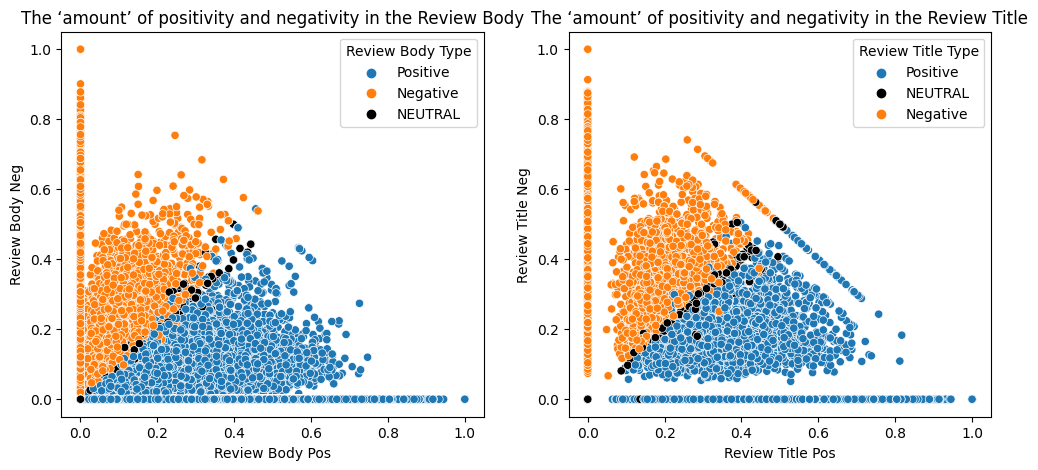

In [6]:
#In this exercise, I will use a CSV file containing reviews for different products. The link for the file is :
# https://drive.google.com/file/d/1NYdZoMJvBWuCejMX28pVRVfMyOe1GhnZ/view?usp=sharing
import numpy as np
import pandas as pd
import nltk

# Step 1: initialize NLTK and load the data
#download vader from nltk
#the data is doloaded in /Users/yongpengfu/nltk_data
#you can change the directory following https://www.nltk.org/data.html
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

# Let us now create a new column in our CSV file that stores the polarity scores of each review.
#creating new column scores using polarity scores function for Review Body
total_review['Review Body Scores']=total_review['Review Body'].apply(lambda body: sia.polarity_scores(str(body)))
total_review['Review Body Compound']=total_review['Review Body Scores'].apply(lambda score_dict:score_dict['compound'])
total_review['Review Body Pos']=total_review['Review Body Scores'].apply(lambda pos_dict:pos_dict['pos'])
total_review['Review Body Neg']=total_review['Review Body Scores'].apply(lambda neg_dict:neg_dict['neg'])
#We then create a new column named type, which indicates whether the review is pos, neg, or neutral.
# decide sentiment as positive, negative and neutral
total_review['Review Body Type']='NEUTRAL'
total_review.loc[total_review['Review Body Compound']>=0.05,'Review Body Type']='Positive'
total_review.loc[total_review['Review Body Compound']<=-0.05,'Review Body Type']='Negative'

#creating new column scores using polarity scores function for Review Title
total_review['Review Title Scores']=total_review['Review Title'].apply(lambda body: sia.polarity_scores(str(body)))
total_review['Review Title Compound']=total_review['Review Title Scores'].apply(lambda score_dict:score_dict['compound'])
total_review['Review Title Pos']=total_review['Review Title Scores'].apply(lambda pos_dict:pos_dict['pos'])
total_review['Review Title Neg']=total_review['Review Title Scores'].apply(lambda neg_dict:neg_dict['neg'])
#We then create a new column named type, which indicates whether the review is pos, neg, or neutral.
# decide sentiment as positive, negative and neutral
total_review['Review Title Type']='NEUTRAL'
total_review.loc[total_review['Review Title Compound']>=0.05,'Review Title Type']='Positive'
total_review.loc[total_review['Review Title Compound']<=-0.05,'Review Title Type']='Negative'

#Finally, we loop through the rows and count the total number of positive, negative, and neutral reviews.
print("The proporation for Review Body Type:\n")
print(total_review['Review Body Type'].value_counts())
print("The proporation for Review Title Type:\n")
print(total_review['Review Title Type'].value_counts())

total_review = total_review.drop(columns=['Review Body Scores','Review Title Scores'])
display(total_review.head(2))

#Show the ‘amount’ of positivity and negativity
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2,figsize=(12,5))
#to ensure same review type has the same color
palette ={"Positive": "C0", "Negative": "C1", "NEUTRAL": "k"}
sns.scatterplot(data=total_review, x="Review Body Pos", y="Review Body Neg", 
                hue="Review Body Type",ax=axes[0], palette=palette).set(title='The ‘amount’ of positivity and negativity in the Review Body')
sns.scatterplot(data=total_review, x="Review Title Pos", y="Review Title Neg", 
                hue="Review Title Type",ax=axes[1],palette=palette).set(title='The ‘amount’ of positivity and negativity in the Review Title')
plt.show()

These phones are usually found in recording studios all over the world. They have a nice flat response and for this price they are an absolute steal! 
 Not for everyone, great for me

{'neg': 0.115, 'neu': 0.792, 'pos': 0.092, 'compound': -0.1759} 
 {'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.5096}

There are total 12714 that have 5 star reviews body but scored Negative in Review Body VADER results
There are total 2221 that have 5 star reviews title but scored Negative in Review Title VADER results

Conclusion: we cannot rely on VADER results to get the tone of a review. Probably a better way to categorize a review is using Review Rating (1-5).


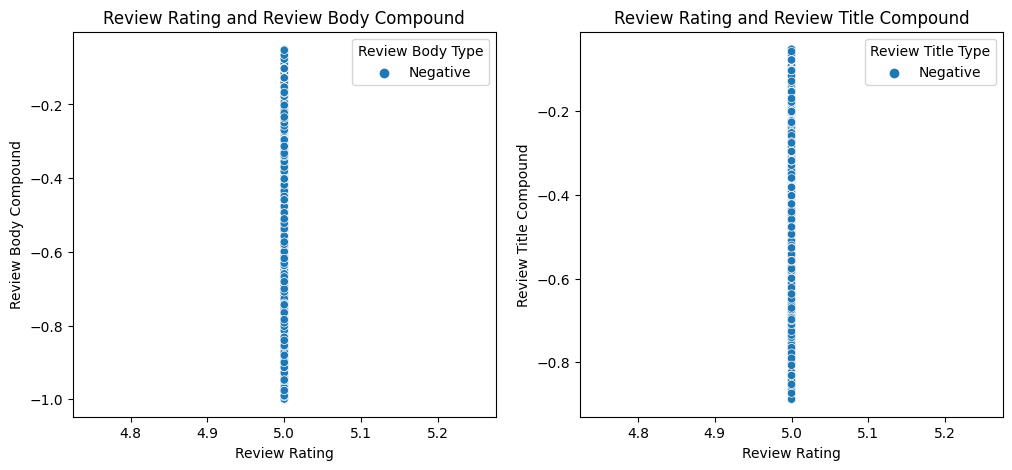

In [7]:
total_review['Review Rating'] = total_review['Review Rating'].astype(float)

Rating_Body_Type = total_review.loc[(total_review['Review Rating']==5.0) \
                                    & (total_review['Review Body Type']=='Negative')]
Rating_Title_Type = total_review.loc[(total_review['Review Rating']==5.0) \
                                     & (total_review['Review Title Type']=='Negative')]

print(Rating_Body_Type.iloc[0,4], '\n',Rating_Title_Type.iloc[0,2])
print()
print(sia.polarity_scores(Rating_Body_Type.iloc[0,4]),'\n', sia.polarity_scores(Rating_Title_Type.iloc[0,2]))
print()
print(f'There are total {len(Rating_Body_Type)} that have 5 star reviews body but'+
          ' scored Negative in Review Body VADER results')
print(f'There are total {len(Rating_Title_Type)} that have 5 star reviews title but' +
          ' scored Negative in Review Title VADER results')
print()
print("Conclusion: we cannot rely on VADER results to get the tone of a review."+
      " Probably a better way to categorize a review is using Review Rating (1-5).")

#Show all the reviews that have 5 star rating but scored Negative in VADER results
fig, axes = plt.subplots(1, 2,figsize=(12,5))
sns.scatterplot(data=Rating_Body_Type, x="Review Rating", y="Review Body Compound",
                hue = "Review Body Type", ax=axes[0]).set(title='Review Rating and Review Body Compound')
sns.scatterplot(data=Rating_Title_Type, x="Review Rating", y="Review Title Compound",
                hue = "Review Title Type", ax=axes[1]).set(title='Review Rating and Review Title Compound')
plt.show()

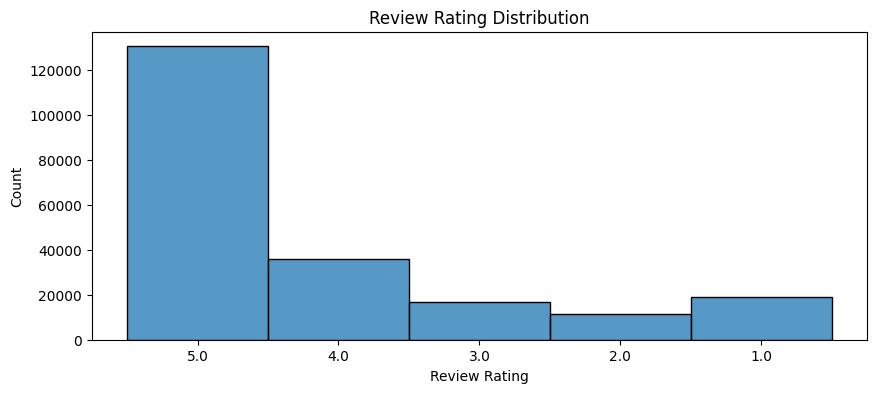

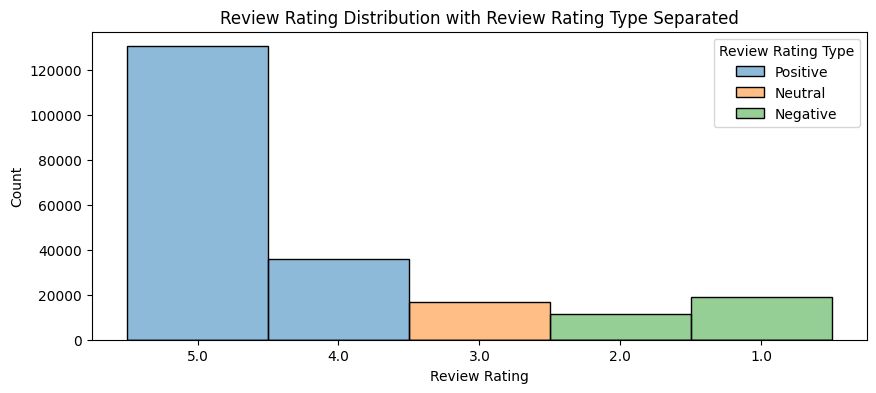

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
Based on previous VADER results, we conclude that we cannot rely on VADER results to get the tone of a review. 
Probably a better way to categorize a review is using Review Rating (1-5).
'''
fig, ax = plt.subplots(figsize=(10,4))
total_review['Review Rating'] = total_review['Review Rating'].astype(float).astype(str)
sns.histplot(data=total_review, x="Review Rating",ax = ax).set(title='Review Rating Distribution')
plt.show()

'''
From the above distribution plot, we see there are 5 ratings associated with each review.
After investigating some of reviews with different rating using 
`total_review.loc[total_review['Review Rating'] =="2.0"].iloc[5,4]`,
we roughly will categorize the review as follows:

5.0, 4.0 >>>> Positive
3.0 >>> Neutral
2.0, 1.0 >>> Negative
'''
total_review['Review Rating'] = total_review['Review Rating'].astype(float).astype(str)
conditions = {"5.0":"Positive", "4.0":"Positive","3.0":"Neutral", "2.0":"Negative", "1.0":"Negative"}
total_review['Review Rating Type'] = total_review['Review Rating'].map(conditions)
# total_review.head(4)

fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=total_review, x="Review Rating",ax = ax, 
             hue = "Review Rating Type").set(title='Review Rating Distribution with Review Rating Type Separated')
plt.show()

In [ ]:
'''
total_review_rating_type = total_review.loc[:,['Review Title', 'Review Body','Review Rating']]

total_review_rating_type['pre_process'] = total_review_rating_type['Review Body'].apply(lambda x: ''.join(x.lower() for x in str(x).split())) #convert to lower case

total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x)) #removing links
total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x: re.sub("(@[A-Za-z0-9_]+).-",'', x)) #removing @texts

def contractions(s):
    s = re.sub(r"won't", ' will not',s)
    s = re.sub(r"would't", ' would not',s)
    s = re.sub(r"could't", ' could not',s)
    s = re.sub(r"\'d",  ' would',s)
    s = re.sub(r"can\'t", ' can not',s)
    s = re.sub(r"n\'t", ' not', s)
    s= re.sub(r"\'re", ' are', s)
    s = re.sub(r"\'s", ' is', s)
    s = re.sub(r"\'ll", ' will', s)
    s = re.sub(r"\'t", ' not', s)
    s = re.sub(r"\'ve", ' have', s)
    s = re.sub(r"\'m", ' am', s)
    return s

total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x:contractions(x))
total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x: re.sub(' +', '', x))

stop = stopwords.words('english')
total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))

lemmatizer = WordNetLemmatizer()
# total_review_rating_type['pre_process']=total_review_rating_type['pre_process'].apply(lambda x: ''.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

total_review_rating_type['pre_process']
'''

0         thesearejustsuperbforaudioquality.youwillhearb...
1         productusedforpurelylisteningpurposesmainlyroc...
2         ihaveseveralothermid-pricedheadphones.soihavea...
3         thesoundiswellbalanced,slightlyonthewarmerside...
4         hadapairoftheseyearsago.foundthatsonystillmake...
                                ...                        
215317    ilovehownoisecancelingthesearebecauseitprovide...
215318    iboughtthisformy3yearold,thesoundisreallygooda...
215319    wow!wonderfulsound,wonderfulquality.constantly...
215320                  foracheaperproduct,itisnotbadatall.
215321    comfortablefitandgoodsoundforsomeonelikemewhow...
Name: pre_process, Length: 213846, dtype: object

In [10]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize #use classical tokenize https://www.nltk.org/
import re, string
import spacy

#Step 1 - Load our data. We only need `Review Title`, `Review Body`, and `Review Rating Type`
total_review_rating_type = total_review.loc[:,['Review Title', 'Review Body','Review Rating']]

#Step 2 — Tokenizing the Data and Remove noice
# Convert to lowercase, and remove stop words
'''
A question, why is not a stopword? 
https://datascience.stackexchange.com/questions/15765/nlp-why-is-not-a-stop-word
https://stackoverflow.com/questions/62051187/why-in-nltk-not-is-considered-as-stopping-word-in-english
'''
'''
Language in its original form cannot be accurately processed by a machine, 
so you need to process the language to make it easier for the machine to understand. 
The first part of making sense of the data is through a process called tokenization, 
or splitting strings into smaller parts called tokens.

A token is a sequence of characters in text that serves as a unit. 
Based on how you create the tokens, they may consist of words, emoticons, hashtags, links, 
or even individual characters. A basic way of breaking language into tokens is by splitting the text 
based on whitespace and punctuation.
'''

'''
In addition to this, you will also remove stop words using a built-in set of stop words in NLTK, 
which needs to be downloaded separately.
'''
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

'''
Words have different forms—for instance, “ran”, “runs”, and “running” are various forms of the same verb, 
“run”. Depending on the requirement of your analysis, 
all of these versions may need to be converted to the same form, “run”. 
Normalization in NLP is the process of converting a word to its canonical form.
'''
'''
wordnet is a lexical database for the English language that helps the script determine the base word. 
You need the averaged_perceptron_tagger resource to determine the context of a word in a sentence.
'''
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
'''
Once downloaded, you are almost ready to use the lemmatizer. Before running a lemmatizer, 
you need to determine the context for each word in your text. 
This is achieved by a tagging algorithm, which assesses the relative position of a word in a sentence. 
'''
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

'''
From the list of tags, here is the list of the most common items and their meaning:

NNP: Noun, proper, singular
NN: Noun, common, singular or mass
IN: Preposition or conjunction, subordinating
VBG: Verb, gerund or present participle
VBN: Verb, past participle

see more in https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb. 
'''
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2226047 # or even higher
#Refer https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html
def remove_noise(review_tokens, stopwords = ()):
    cleaned_tokens = []
    
    for token, tag in pos_tag(review_tokens):
        #remove link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        #remove any @text
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        #If we still have string left
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

total_review_rating_type['Review Body Tokenized'] = total_review_rating_type\
    .apply(lambda row: remove_noise(word_tokenize(row['Review Body']), stop_words), axis=1)
# total_review_rating_type.to_csv("/Users/yongpengfu/Desktop/total_review_rating_type_without_stopwords.csv")
#to show what is before and after removing noice
total_review_rating_type.iloc[0,1], total_review_rating_type.iloc[0,3]

("These are just superb for audio quality. You'll hear base and treble that you won't via bluetooth or lower quality. Even my Bose headphones can't match these for sound.Good points are well built, long cable and decent build quality. Also the audio which as noted above is superb.Bad points are they're not the most comfortable if you wear for prolonged periods of time.",
 ['superb',
  'audio',
  'quality',
  "'ll",
  'hear',
  'base',
  'treble',
  'wo',
  "n't",
  'via',
  'bluetooth',
  'low',
  'quality',
  'even',
  'bose',
  'headphone',
  'ca',
  "n't",
  'match',
  'sound.good',
  'point',
  'well',
  'build',
  'long',
  'cable',
  'decent',
  'build',
  'quality',
  'also',
  'audio',
  'note',
  'superb.bad',
  'point',
  "'re",
  'comfortable',
  'wear',
  'prolonged',
  'period',
  'time'])

In [11]:
total_review_rating_type

,Review Title,Review Body,Review Rating,Review Body Tokenized
0,"Superb audio, changes how you listen to music",These are just superb for audio quality. You'l...,5.0,"[superb, audio, quality, 'll, hear, base, treb..."
1,Basic build Great sound for the price,Product used for purely listening purposes mai...,4.0,"[product, use, purely, listen, purpose, mainly..."
2,Good sound.,I have several other mid-priced headphones. So...,4.0,"[several, mid-priced, headphone, comparison, r..."
3,Well balanced sound,"The sound is well balanced, slightly on the wa...",5.0,"[sound, well, balance, slightly, warm, side, g..."
4,Great Headphones!,Had a pair of these years ago. Found that Sony...,5.0,"[pair, year, ago, found, sony, still, make, pi..."
...,...,...,...,...
215317,Great product,I love how noise canceling these are because i...,5.0,"[love, noise, canceling, provide, snug, fit, w..."
215318,Good.,"I bought this for my 3 year old, the sound is ...",5.0,"[buy, 3, year, old, sound, really, good, clear..."
215319,Great purchase,"Wow! Wonderful sound, wonderful quality. Con...",5.0,"[wow, wonderful, sound, wonderful, quality, co..."
215320,Cheaper Sony,"For a cheaper product, it's not bad at all.",4.0,"[cheap, product, 's, bad]"


Using Word2Vec Approach for word embeddings

In [70]:
#word2vec

# download word2vec model - https://www.kaggle.com/datasets/mks2192/word2vec-model

# !wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
from gensim.models import KeyedVectors
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [71]:
#just for testing the word2vec model (this command takes around 1 min to run)

word2vec.most_similar('trump')


[('trumps', 0.7198434472084045),
 ('trumping', 0.580585241317749),
 ('supersede', 0.5600423216819763),
 ('trumped', 0.5497317910194397),
 ('supercede', 0.5309919118881226),
 ('prevail', 0.487763375043869),
 ('outweigh', 0.4785327911376953),
 ('trample', 0.4714253544807434),
 ('overshadow', 0.4701153635978699),
 ('dictate', 0.46754559874534607)]

In [15]:
sentence = "I love natural language processing"
words = sentence.lower().split()
model = word2vec
# Get the Word2Vec embeddings for each word in the sentence
embeddings = []
for word in words:
    if word in model:
        embeddings.append(model[word])
# Compute the average of the Word2Vec embeddings for the sentence
if embeddings:
    sentence_embedding = sum(embeddings) / len(embeddings)
else:
    sentence_embedding = []

# Print the sentence embedding
print(sentence_embedding)

[-3.17871086e-02  1.78222656e-02  5.98632805e-02  1.46630853e-01
 -9.44580063e-02  6.90917969e-02  1.13623045e-01 -4.71801758e-02
 -1.75781250e-02  7.14843720e-02  1.37939453e-02 -1.45800784e-01
 -1.97729498e-01 -1.83349606e-02 -4.87792976e-02  3.59374993e-02
 -3.48144546e-02  1.54638678e-01  5.12817390e-02 -1.17016599e-01
 -9.74609405e-02  9.42382812e-02  1.77734382e-02  3.68041992e-02
  3.06884758e-02 -6.21093735e-02 -3.40209976e-02  3.71093745e-03
  3.82812507e-02 -5.32226562e-02 -6.37207041e-03  4.98046875e-02
 -8.34594741e-02  4.33593765e-02 -7.61718750e-02  4.65820320e-02
 -6.77001923e-02  5.02929688e-02 -1.73583981e-02  5.47851548e-02
  1.54260248e-01 -6.38061538e-02  1.52819827e-01  9.38720703e-02
 -3.83789055e-02 -1.05273440e-01  2.20214836e-02  7.16308579e-02
 -1.41149908e-01  8.02978501e-02  7.76901236e-03 -8.97460952e-02
  1.93359368e-02  3.35815437e-02 -1.88476555e-02  2.21093744e-01
 -1.08406067e-01 -1.57226562e-01  2.35198978e-02 -4.43603508e-02
  5.98632805e-02  3.45336

In [72]:
import pandas as pd
import numpy as np
import gensim

model = word2vec
reviews_df = total_review_rating_type

# Define a function to get the Word2Vec embedding for a sentence
def get_sentence_embedding(sentence):
    # Split the sentence into individual words
    words = sentence.lower().split()

    # Get the Word2Vec embeddings for each word in the sentence
    embeddings = []
    for word in words:
        if word in model:
            embeddings.append(model[word])

    # Compute the average of the Word2Vec embeddings for the sentence
    if embeddings:
        sentence_embedding = sum(embeddings) / len(embeddings)
    else:
        sentence_embedding = np.zeros(300) # Use a zero vector if no embeddings are found

    return sentence_embedding

# Apply the Word2Vec model to the reviews data
total_review_rating_type['word2vec_embedding'] = total_review_rating_type['Review Body'].apply(get_sentence_embedding)

# Print the embeddings for the first five reviews
print(total_review_rating_type['word2vec_embedding'].head())


0    [-0.0006233498, -0.0007591954, -0.021220455, 0...
1    [0.02910033, 0.028799335, 0.016762134, 0.08821...
2    [0.016150447, 0.037543267, 0.01726479, 0.08913...
3    [-0.008524968, 0.017336331, -0.01911046, 0.099...
4    [0.009349681, 0.03613087, 0.03594575, 0.102467...
Name: word2vec_embedding, dtype: object


In [73]:
total_review_rating_type

,Review Title,Review Body,Review Rating,Review Body Tokenized,word2vec_embedding
0,"Superb audio, changes how you listen to music",These are just superb for audio quality. You'l...,5.0,"[superb, audio, quality, 'll, hear, base, treb...","[-0.0006233498, -0.0007591954, -0.021220455, 0..."
1,Basic build Great sound for the price,Product used for purely listening purposes mai...,4.0,"[product, use, purely, listen, purpose, mainly...","[0.02910033, 0.028799335, 0.016762134, 0.08821..."
2,Good sound.,I have several other mid-priced headphones. So...,4.0,"[several, mid-priced, headphone, comparison, r...","[0.016150447, 0.037543267, 0.01726479, 0.08913..."
3,Well balanced sound,"The sound is well balanced, slightly on the wa...",5.0,"[sound, well, balance, slightly, warm, side, g...","[-0.008524968, 0.017336331, -0.01911046, 0.099..."
4,Great Headphones!,Had a pair of these years ago. Found that Sony...,5.0,"[pair, year, ago, found, sony, still, make, pi...","[0.009349681, 0.03613087, 0.03594575, 0.102467..."
...,...,...,...,...,...
215317,Great product,I love how noise canceling these are because i...,5.0,"[love, noise, canceling, provide, snug, fit, w...","[-0.0027804906, -0.0030278736, 0.023308987, 0...."
215318,Good.,"I bought this for my 3 year old, the sound is ...",5.0,"[buy, 3, year, old, sound, really, good, clear...","[0.042855915, 0.04096177, 0.025444934, 0.08953..."
215319,Great purchase,"Wow! Wonderful sound, wonderful quality. Con...",5.0,"[wow, wonderful, sound, wonderful, quality, co...","[0.04916992, 0.028342342, 0.031886674, 0.08988..."
215320,Cheaper Sony,"For a cheaper product, it's not bad at all.",4.0,"[cheap, product, 's, bad]","[0.0039774575, -0.067464195, 0.07941691, 0.145..."


In [74]:
import numpy as np

vector = np.vectorize(np.int_)
x = total_review_rating_type['word2vec_embedding']
x_array = np.array(list(map(np.int_, x)))
# x_array = np.array(x)
# x_vector = vector(x_array)

y = total_review_rating_type['Review Rating']
# y_array = np.array(list(map(np.int_, y)))
# y_array = np.array(y)
# y_vector = vector(y_array)

In [75]:
from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train, Y_test = train_test_split(total_review_rating_type['word2vec_embedding'], total_review_rating_type['Review Rating'], test_size=0.25, random_state=30)
X_train,X_test,Y_train, Y_test = train_test_split(x_array, y, test_size=0.25, random_state=30)

In [76]:
from sklearn.naive_bayes import GaussianNB
import scipy.sparse as sp

gnb = GaussianNB()

# Convert sparse training data to dense array
# tf_x_train_dense = tf_x_train.toarray()
gnb.fit(X_train, Y_train)

# Convert sparse testing data to dense array before making predictions
# tf_x_test_dense = tf_x_test.toarray()
y_pred = gnb.predict(X_test)

acc_te = accuracy_score(Y_test, y_pred)
print('accuracy from Gaussian Naive Bayes: ',acc_te)

accuracy from Gaussian Naive Bayes:  0.08804384422580525


In [77]:
#SVM-linear

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=0)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
report=classification_report(Y_test, Y_test,output_dict=True)
accuracy = accuracy_score(Y_test, y_pred)
print(report)
print("Accuracy:", accuracy)


{'1.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4704}, '2.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2806}, '3.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4199}, '4.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9014}, '5.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32739}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53462}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53462}}
Accuracy: 0.6123788859376753


In [84]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MultinomialNB()
model.fit(X_train, Y_train)
accuracy = accuracy_score(Y_test, model.predict(X_test))
print("accuracy from multinomial Naive Bayes: ",accuracy)

accuracy from multinomial Naive Bayes:  0.6123788859376753


In [82]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Training the logistic regression model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)

#accuracy score - test set
acc_test = accuracy_score(Y_test, model.predict(X_test))
print('test_accuracy from Logistic regression',acc_test)

test_accuracy from Logistic regression 0.6123788859376753


TF - IDF approach for word embeddings
https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1


In [12]:
# converting Review Body Tokenized from list to string
total_review_rating_type['Review Body Tokenized'] = total_review_rating_type['Review Body Tokenized'].apply(lambda s: ' '.join(s))
total_review_rating_type

,Review Title,Review Body,Review Rating,Review Body Tokenized
0,"Superb audio, changes how you listen to music",These are just superb for audio quality. You'l...,5.0,superb audio quality 'll hear base treble wo n...
1,Basic build Great sound for the price,Product used for purely listening purposes mai...,4.0,product use purely listen purpose mainly rock ...
2,Good sound.,I have several other mid-priced headphones. So...,4.0,several mid-priced headphone comparison rate s...
3,Well balanced sound,"The sound is well balanced, slightly on the wa...",5.0,sound well balance slightly warm side good tre...
4,Great Headphones!,Had a pair of these years ago. Found that Sony...,5.0,pair year ago found sony still make pick anoth...
...,...,...,...,...
215317,Great product,I love how noise canceling these are because i...,5.0,love noise canceling provide snug fit without ...
215318,Good.,"I bought this for my 3 year old, the sound is ...",5.0,buy 3 year old sound really good clear pretty ...
215319,Great purchase,"Wow! Wonderful sound, wonderful quality. Con...",5.0,wow wonderful sound wonderful quality constant...
215320,Cheaper Sony,"For a cheaper product, it's not bad at all.",4.0,cheap product 's bad


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(total_review_rating_type['Review Body Tokenized'], total_review_rating_type['Review Rating'], test_size=0.25, random_state=30)

In [14]:
#TF-IDF

print("TF-IDF Vectoriser...")
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)



TF-IDF Vectoriser...


In [16]:
#SVM-linear

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,Y_train)
y_test_pred=clf.predict(tf_x_test)
report=classification_report(Y_test, y_test_pred,output_dict=True)
accuracy = accuracy_score(Y_test, y_test_pred)
print(report)
print("Accuracy:", accuracy)


{'1.0': {'precision': 0.5802774083222497, 'recall': 0.6492346938775511, 'f1-score': 0.6128223136349955, 'support': 4704}, '2.0': {'precision': 0.33583489681050654, 'recall': 0.12758374910905204, 'f1-score': 0.18491735537190082, 'support': 2806}, '3.0': {'precision': 0.33995381062355656, 'recall': 0.17527982853060253, 'f1-score': 0.23130106851037086, 'support': 4199}, '4.0': {'precision': 0.405308321692277, 'recall': 0.22531617483913913, 'f1-score': 0.2896256684491979, 'support': 9014}, '5.0': {'precision': 0.7665740671221564, 'recall': 0.9355814166590305, 'f1-score': 0.842687355562892, 'support': 32739}, 'accuracy': 0.6885077251131645, 'macro avg': {'precision': 0.48558970091414916, 'recall': 0.42259917260307506, 'f1-score': 0.4322707523058714, 'support': 53462}, 'weighted avg': {'precision': 0.6331555365540555, 'recall': 0.6885077251131645, 'f1-score': 0.6466696823605965, 'support': 53462}}
Accuracy: 0.6885077251131645


In [17]:
from sklearn.naive_bayes import GaussianNB
import scipy.sparse as sp

gnb = GaussianNB()

# Convert sparse training data to dense array
tf_x_train_dense = tf_x_train.toarray()
gnb.fit(tf_x_train_dense, Y_train)

# Convert sparse testing data to dense array before making predictions
tf_x_test_dense = tf_x_test.toarray()
y_pred = gnb.predict(tf_x_test_dense)

acc_te = accuracy_score(Y_test, y_pred)
print('accuracy from Gaussian Naive Bayes: ',acc_te)

: 

: 

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(tf_x_train, Y_train)
accuracy = accuracy_score(Y_test, model.predict(tf_x_test))
print("accuracy from multinomial Naive Bayes: ",accuracy)

NameError: name 'accuracy_score' is not defined